In [30]:
## Data Set and Link to refer : https://drlee.io/build-a-binary-classifier-with-tensorflow-in-15-minutes-mushroom-classification-ffec8f66ad31

In [1]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fenago/datasets/main/mushrooms.csv'
df = pd.read_csv(url)
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2472,e,x,f,n,t,n,f,c,b,w,...,s,g,g,p,w,o,p,k,v,d
2040,e,f,f,g,t,n,f,c,b,w,...,s,p,w,p,w,o,p,n,y,d
4695,p,f,f,y,f,f,f,c,b,h,...,k,n,p,p,w,o,l,h,v,p
885,e,x,s,w,t,a,f,w,n,p,...,s,w,w,p,w,o,p,u,v,d
456,e,b,s,w,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [2]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [3]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('class_p', axis=1)
y = df_encoded['class_p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
204/204 [==============================] - 2s 2ms/step - loss: 0.0783 - accuracy: 0.9771
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 9.9681e-04 - accuracy: 0.9998
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 1.5000e-04 - accuracy: 1.0000
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 6.1968e-05 - accuracy: 1.0000
Epoch 5/100
204/204 [==============================] - 0s 2ms/step - loss: 3.3947e-05 - accuracy: 1.0000
Epoch 6/100
204/204 [==============================] - 0s 2ms/step - loss: 2.1577e-05 - accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 0s 2ms/step - loss: 1.3745e-05 - accuracy: 1.0000
Epoch 8/100
204/204 [==============================] - 1s 2ms/step - loss: 8.8631e-06 - accuracy: 1.0000
Epoch 9/100
204/204 [==============================] - 1s 3ms/step - loss: 5.7886e-06 - accuracy: 1.0000
Epoch 10/100
204/204 [==============================] - 1s 

In [5]:
predictions = model.predict(X_test)

51/51 [==============================] - 0s 2ms/step


In [ ]:
prediction_classes_class = [
    'p' if prob > 0.5 else 'e' for prob in np.ravel(predictions)
]
# convert prediction probabilities to binary predictions
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

prediction_classes

In [8]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[843   0]
 [  0 782]]


In [9]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')

Accuracy: 1.00


# Improved Model with Hyperparameter Tuning, Regularization, Dropout, and Early Stopping

In [16]:
# Hyperparameter Tuning
## Changing Learning Rate

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.0001), # decreasing learning rate
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
204/204 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9692
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 5.1196e-04 - accuracy: 1.0000
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 1.1581e-04 - accuracy: 1.0000
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 5.1693e-05 - accuracy: 1.0000
Epoch 5/100
204/204 [==============================] - 0s 2ms/step - loss: 2.8394e-05 - accuracy: 1.0000
Epoch 6/100
204/204 [==============================] - 0s 2ms/step - loss: 1.7722e-05 - accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 1s 4ms/step - loss: 1.1934e-05 - accuracy: 1.0000
Epoch 8/100
204/204 [==============================] - 1s 3ms/step - loss: 8.3754e-06 - accuracy: 1.0000
Epoch 9/100
204/204 [==============================] - 1s 3ms/step - loss: 5.9994e-06 - accuracy: 1.0000
Epoch 10/100
204/204 [==============================] - 1s 

In [17]:
# Changing the Number of Layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'), # adding another layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
204/204 [==============================] - 3s 3ms/step - loss: 0.0730 - accuracy: 0.9717
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 2.3021e-04 - accuracy: 1.0000
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 5.4975e-05 - accuracy: 1.0000
Epoch 4/100
204/204 [==============================] - 1s 4ms/step - loss: 2.7071e-05 - accuracy: 1.0000
Epoch 5/100
204/204 [==============================] - 1s 4ms/step - loss: 1.4664e-05 - accuracy: 1.0000
Epoch 6/100
204/204 [==============================] - 1s 5ms/step - loss: 9.5084e-06 - accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 1s 4ms/step - loss: 6.4488e-06 - accuracy: 1.0000
Epoch 8/100
204/204 [==============================] - 1s 3ms/step - loss: 4.5842e-06 - accuracy: 1.0000
Epoch 9/100
204/204 [==============================] - 1s 3ms/step - loss: 3.3590e-06 - accuracy: 1.0000
Epoch 10/100
204/204 [==============================] - 0s 

In [18]:
## Including Regularization (L1 Regularization) and Early Stopping
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


model_l1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_l1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

history_l1 = model_l1.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

## In the above code, we have added an L1 regularization penalty term with a strength of 0.001 to each of the hidden layers using the kernel_regularizer argument in the Dense layer.

Epoch 1/100
204/204 [==============================] - 2s 4ms/step - loss: 1.2999 - accuracy: 0.9757 - val_loss: 0.4459 - val_accuracy: 0.9988
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 0.2976 - accuracy: 0.9982 - val_loss: 0.2098 - val_accuracy: 0.9988
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 0.1679 - accuracy: 0.9986 - val_loss: 0.1343 - val_accuracy: 0.9994
Epoch 4/100
204/204 [==============================] - 1s 3ms/step - loss: 0.1164 - accuracy: 0.9989 - val_loss: 0.1000 - val_accuracy: 0.9994
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.9992 - val_loss: 0.0818 - val_accuracy: 0.9994
Epoch 6/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0745 - accuracy: 0.9994 - val_loss: 0.0710 - val_accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0635 - accuracy: 0.9997 - val_loss: 0.0584 - val_accuracy: 1.0000

In [19]:
# Implementing Dropout regularization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True
)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
204/204 [==============================] - 2s 4ms/step - loss: 1.7971 - accuracy: 0.8914 - val_loss: 0.8733 - val_accuracy: 0.9865
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 0.6238 - accuracy: 0.9851 - val_loss: 0.4053 - val_accuracy: 0.9969
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 0.3574 - accuracy: 0.9898 - val_loss: 0.2706 - val_accuracy: 0.9994
Epoch 4/100
204/204 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.9917 - val_loss: 0.2161 - val_accuracy: 0.9988
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 0.2180 - accuracy: 0.9938 - val_loss: 0.1819 - val_accuracy: 0.9988
Epoch 6/100
204/204 [==============================] - 1s 3ms/step - loss: 0.1963 - accuracy: 0.9922 - val_loss: 0.1648 - val_accuracy: 0.9994
Epoch 7/100
204/204 [==============================] - 1s 3ms/step - loss: 0.1790 - accuracy: 0.9940 - val_loss: 0.1492 - val_accuracy: 0.9994

In [21]:
# This code is already up above - just calling it out here
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
204/204 [==============================] - 2s 8ms/step - loss: 0.0835 - accuracy: 0.9948 - val_loss: 0.0693 - val_accuracy: 1.0000
Epoch 2/100
204/204 [==============================] - 2s 10ms/step - loss: 0.0849 - accuracy: 0.9948 - val_loss: 0.0687 - val_accuracy: 1.0000
Epoch 3/100
204/204 [==============================] - 1s 6ms/step - loss: 0.0842 - accuracy: 0.9942 - val_loss: 0.0711 - val_accuracy: 1.0000
Epoch 4/100
204/204 [==============================] - 1s 5ms/step - loss: 0.0763 - accuracy: 0.9971 - val_loss: 0.0658 - val_accuracy: 1.0000
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0799 - accuracy: 0.9957 - val_loss: 0.0677 - val_accuracy: 1.0000
Epoch 6/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0844 - accuracy: 0.9951 - val_loss: 0.0714 - val_accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0808 - accuracy: 0.9962 - val_loss: 0.0674 - val_accuracy: 1.000

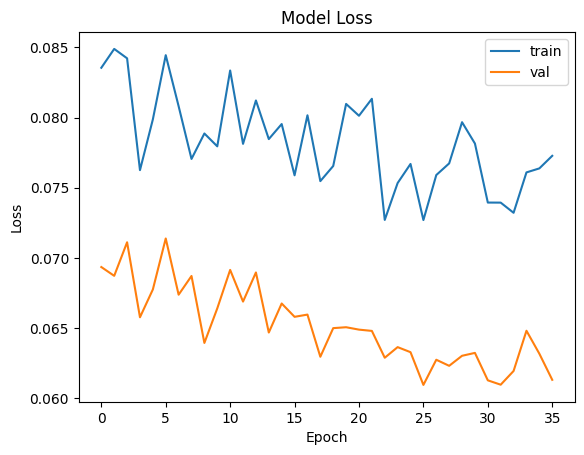

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [23]:
model.save('mushroom_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from tensorflow.keras.models import load_model

loaded_model = load_model('mushroom_classification_model.h5')

In [25]:
new_data = pd.DataFrame({
    'cap-shape': ['f'],
    'cap-surface': ['y'],
    'cap-color': ['n'],
    'bruises': ['f'],
    'odor': ['a'],
    'gill-attachment': ['f'],
    'gill-spacing': ['c'],
    'gill-size': ['n'],
    'gill-color': ['b'],
    'stalk-shape': ['e'],
    'stalk-root': ['c'],
    'stalk-surface-above-ring': ['s'],
    'stalk-surface-below-ring': ['s'],
    'stalk-color-above-ring': ['w'],
    'stalk-color-below-ring': ['w'],
    'veil-type': ['p'],
    'veil-color': ['w'],
    'ring-number': ['o'],
    'ring-type': ['p'],
    'spore-print-color': ['n'],
    'population': ['c'],
    'habitat': ['l']
})

In [26]:
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

In [33]:
pd.__version__

'1.5.3'

In [31]:
new_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   cap-shape_c                 1 non-null      int64
 1   cap-shape_f                 1 non-null      uint8
 2   cap-shape_k                 1 non-null      int64
 3   cap-shape_s                 1 non-null      int64
 4   cap-shape_x                 1 non-null      int64
 5   cap-surface_g               1 non-null      int64
 6   cap-surface_s               1 non-null      int64
 7   cap-surface_y               1 non-null      uint8
 8   cap-color_c                 1 non-null      int64
 9   cap-color_e                 1 non-null      int64
 10  cap-color_g                 1 non-null      int64
 11  cap-color_n                 1 non-null      uint8
 12  cap-color_p                 1 non-null      int64
 13  cap-color_r                 1 non-null      int64
 14  cap-color_u   

In [28]:
loaded_model = tf.keras.models.load_model('mushroom_classification_model.h5')
prediction = loaded_model.predict(new_data_encoded)
prediction_class = int(prediction > 0.5)

print('Prediction:', prediction_class)

1/1 [==============================] - 0s 135ms/step
Prediction: 1


In [29]:
print(tf.__version__)

2.13.0
